# Figure 4: Scatterplot of EOF Loadings / Clusters

In [2]:
# Import Python modules
import os, sys
from pathlib import Path
import numpy as np
import pandas as pd
import xarray as xr
# matplotlib
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from mpl_toolkits.axes_grid1 import AxesGrid
from matplotlib.colors import ListedColormap
from matplotlib import rcParams
# plot styles/formatting
import seaborn as sns

# Path to modules
sys.path.append('../modules')

In [3]:
# Set up paths

path_to_data = '/home/nash/DATA/data/'                            # project data -- read only
path_to_out  = '/home/nash/DATA/repositories/AR_types/out/'       # output files (numerical results, intermediate datafiles) -- read & write
path_to_figs = '/home/nash/DATA/repositories/AR_types/figs/'      # figures


In [4]:
# Set default font for all plots
rcParams['font.family'] = 'sans-serif'   # set the default font family to 'sans-serif'
rcParams['font.sans-serif'] = 'Arial'    # set the default sans-serif font to 'Arial'


## Import Data

In [5]:
## Set variable names (for saving data/figs)
var_names = 'HUV250QUV850'
eofmode = 't' # s or t
dispmat = 'cor' # dispersion matrix type correlation/covariance

# Select lat/lon grid
lonmin = 0
lonmax = 120
latmin = -15
latmax =  65

# for figure names for testing different configurations
fname_id = var_names + eofmode + str(lonmin) + str(lonmax) + str(latmin) + str(latmax) + dispmat


In [6]:
# Loadings & AR CAT
filepath = path_to_out + fname_id +'hma_AR-types-loadings.csv'
df = pd.read_csv(filepath)
df.head()


,Unnamed: 0,LOC,EOF1,EOF2,AR_CAT,EOF_CAT1,EOF_CAT2,EOF_CAT
0,1979-12-01 09:00:00,R03,-0.276988,0.189918,2,0,0,0
1,1979-12-02 09:00:00,R01,-0.205560,-0.151426,4,0,0,0
2,1980-01-24 09:00:00,R01,-0.279432,0.163659,2,0,0,0
3,1980-01-25 09:00:00,R01,-0.152753,0.022518,2,0,0,0
4,1980-02-12 09:00:00,R01,-0.203863,-0.155912,4,0,0,0


In [13]:
df.AR_CAT

0      2
1      4
2      2
3      2
4      4
      ..
366    1
367    1
368    3
369    3
370    4
Name: AR_CAT, Length: 371, dtype: int64

In [7]:
# Load centroid data

infile = path_to_out + fname_id + 'centroids.txt'
data = np.loadtxt(infile, delimiter=',')
centroids = data[:,1:5]
print(centroids)


[[ 0.19093532  0.33325056]
 [-0.31941364  0.0738183 ]
 [ 0.39681086 -0.12901277]
 [-0.07694388 -0.28557996]]


In [8]:
# Save data to numpy arrays

# 1d array of ar cats
ar_cat = df['AR_CAT'].to_numpy()

# array sizes
ntot = len(ar_cat)
neof = 4

# 2d array of loadings
loadings = np.empty((ntot, neof))
loadings[:,0] = df['EOF1']
loadings[:,1] = df['EOF2']
print(loadings)

[[-2.76987518e-001  1.89918206e-001  4.63909554e-310  4.63909554e-310]
 [-2.05560080e-001 -1.51425777e-001  4.94065646e-324  4.63909554e-310]
 [-2.79431718e-001  1.63658586e-001  4.63889500e-310  4.63909554e-310]
 ...
 [ 4.07288423e-001 -1.27862310e-001  0.00000000e+000  0.00000000e+000]
 [ 2.74920160e-001 -6.08702253e-003  0.00000000e+000  0.00000000e+000]
 [ 8.49563787e-002 -2.24781757e-001  0.00000000e+000  0.00000000e+000]]


## Figure

In [9]:
# Define colors for clusters

color_array = np.array(([4/256, 133/256, 155/256, 1], # blue
                        [122/256, 141/256, 57/256, 1], # green
                       [239/256, 86/256, 69/256, 1],  # coral
                       [254/256, 188/256, 17/256, 1]))  # gold

# color_array = np.array(([59/256, 143/256, 179/256, 1], # blue
#                         [128/256, 160/256, 53/256, 1], # green
#                        [179/256, 59/256, 143/256, 1],  # purple/magenta
#                        [179/256, 95/256, 59/256, 1]))  # orange

newcmap = ListedColormap(color_array)

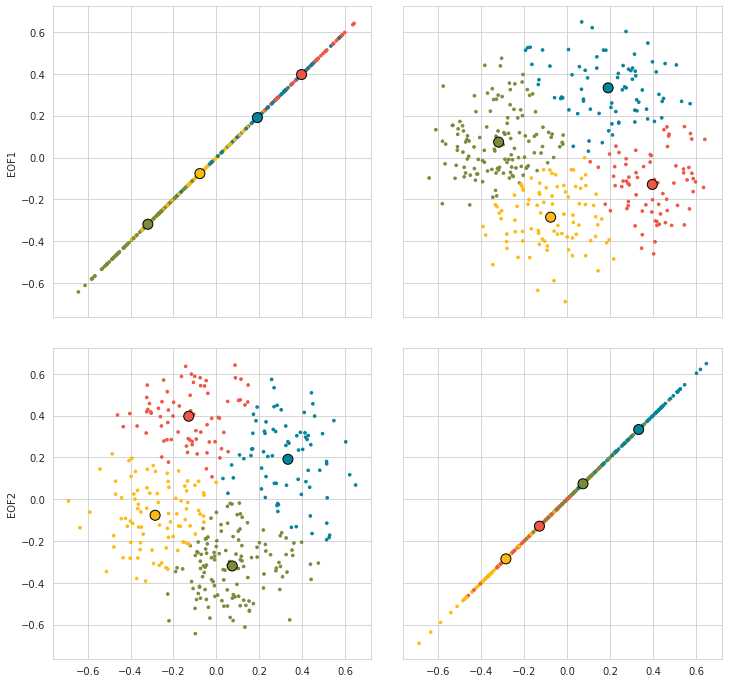

In [14]:
# Panel of Scatter Plots: 4 x 4

# plot style
sns.set_style('whitegrid')

# fig layout
nrows = 2
ncols = 2
nplots = nrows*ncols

# eof labels
eof_label = ['EOF1','EOF2']
# centroids (?)
cent_ar_cat = [0, 1, 2, 3]

# tickmarks
ticks = np.arange(-0.9,0.91,0.3)
xmin = -0.89
xmax = 0.89
ymin = xmin
ymax = xmax

# dot sizes
dotsize = 7
ctrsize = 100

# create figure with multiple axes
fig = plt.figure(figsize=(12,12))
axs = fig.subplots(nrows=nrows, ncols=ncols, sharex=True, sharey=True)

# minimize white space between plots
fig.subplots_adjust(hspace=0.1, wspace=0.1)   # default=0.2

# loop to draw plots
for i in range(nrows):
    for j in range(ncols):
        # scatterplot
        s = axs[i,j].scatter(loadings[:,i], loadings[:,j], 
                             s=dotsize, c=ar_cat, cmap=newcmap)
        # centroids
        c = axs[i,j].scatter(centroids[:,i], centroids[:,j], 
                             s=ctrsize, c=cent_ar_cat, cmap=newcmap, edgecolors='black')
        
        # shared axis labels
        if j == 0:
            axs[i,j].set_ylabel(eof_label[i])
        if i == 3:
            axs[i,j].set_xlabel(eof_label[j])
        
        
plt.show()



In [ ]:
## scatter plot (single plot)

sns.set_style('whitegrid')
eof_label = ['EOF1','EOF2','EOF3','EOF4']
cent_ar_cat = [0, 1, 2, 3]

nplots=1
fig, ax = plt.subplots(1, nplots, figsize=(11,5))
dotsize=7
centersize = 120

# set for all plots
ticks = np.arange(-0.9,0.91,0.3)
#for k in range(nplots):
ax.set_aspect('equal', 'box')
ax.axhline(color='black')
ax.axvline(color='black')
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.tick_params(axis='both', pad=1)
ax.set_xlim(-0.89,0.89)
ax.set_ylim(-0.89,0.89)

# plot 1: EOF2 v. EOF3
i=1; j=2
s1 = ax.scatter(loadings[:,i], loadings[:,j], s=dotsize, c=ar_cat, cmap=newcmap)
c1 = ax.scatter(centroids[:,i], centroids[:,j], s=centersize, 
               c=cent_ar_cat, cmap=newcmap, edgecolors='black', zorder=10)
ax.set_xlabel(eof_label[i])
ax.set_ylabel(eof_label[j])
legend = ax.legend(*s1.legend_elements(), loc='lower right', borderpad=0.25, labelspacing=0.3)
ax.set_title('Scatterplot of EOF Loadings')


# save fig
#filepath = home/'Desktop' / 'scatter.png'
#plt.savefig(filepath, bbox_inches='tight', dpi=200)

plt.show()


In [ ]:
## Two Plots ## -- from original

# sns.set_style('ticks')
# eof_label = ['EOF1','EOF2','EOF3','EOF4']
# cent_llj_cat = [0, 1, 2, 3]

# nplots=2
# fig, ax = plt.subplots(1, nplots, figsize=(11,5))
# dotsize=7
# centersize = 120

# # set for all plots
# ticks = np.arange(-0.8,0.81,0.2)
# for k in range(nplots):
#     ax[k].set_aspect('equal', 'box')
#     ax[k].axhline(color='black')
#     ax[k].axvline(color='black')
#     ax[k].set_xticks(ticks)
#     ax[k].set_yticks(ticks)
#     ax[k].tick_params(axis='both', pad=1)
#     ax[k].set_xlim(-0.99,0.99)
#     ax[k].set_ylim(-0.99,0.99)

# # plot 1: EOF1 v. EOF2
# i=0; j=1
# s1 = ax[0].scatter(loadings[:,i], loadings[:,j], s=dotsize, c=llj_cat, cmap=newcmap)
# c1 = ax[0].scatter(centroids[:,i], centroids[:,j], s=centersize, 
#                c=cent_llj_cat, cmap=newcmap, edgecolors='black', zorder=10)
# ax[0].set_xlabel(eof_label[i])
# ax[0].set_ylabel(eof_label[j])

# # plot 2: EOF2 v. EOF3
# i=2; j=3
# s2 = ax[1].scatter(loadings[:,i], loadings[:,j], s=dotsize, c=llj_cat, cmap=newcmap)
# c2 = ax[1].scatter(centroids[:,i], centroids[:,j], s=centersize, c=cent_llj_cat, 
#                    cmap=newcmap, edgecolors='black', zorder=10)
# ax[1].set_xlabel(eof_label[i])
# ax[1].set_ylabel(eof_label[j])

# # legend
# legend = ax[1].legend(*s2.legend_elements(), title='LLJ Types',
#                       bbox_to_anchor=(1.02, 0.91), loc='upper left', 
#                       borderaxespad=0.)
# ax[1].add_artist(legend)

# nplots=2
# for k in range(nplots):
#     ax[k].set_aspect('equal', 'box')
#     ax[k].set_xticks(ticks)
#     ax[k].set_yticks(ticks)
#     ax[k].tick_params(axis='both', pad=1)

# # save fig
# #filepath = path_to_figs / 'fig4.png'
# #plt.savefig(filepath, bbox_inches='tight', dpi=150)

# plt.show()
